In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg.dsolve import spsolve
from scipy.sparse.linalg import bicgstab, bicg, cg, cgs, gmres, lgmres, minres, qmr, gcrotmk
from IPython.display import HTML
import time
#%matplotlib inline

In [2]:
def coeffs_P3(lbda,F0,f0,T):
    a = (lbda+f0)/T
    b = (f0**2+lbda*f0 -f0*F0)/T
    c = -F0*f0*(lbda+2*f0)/T
    d = (F0*f0)**2
    return [a,b,c,d]

def plot_roots():
    X =[]
    for n in np.linspace(0,20,10000):
        s = n/2
        roots = np.roots([1]+[s**2*x for x in coeffs_P3(lbda,F0,f0,T)])
        roots = roots[np.isreal(roots)]
        for i in range(len(roots)):
            X+=[[s,roots[i]]]

    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    S = []
    Root = []
    for i in range(len(X)):
        S += [X[i][0]]
        Root += [X[i][1]]
    plt.figsize=(3,3)
   # plt.axis((0,10,-5,1))
    plt.scatter(S,Root,marker='.')

/home/ltoran/.local/lib/python3.6/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


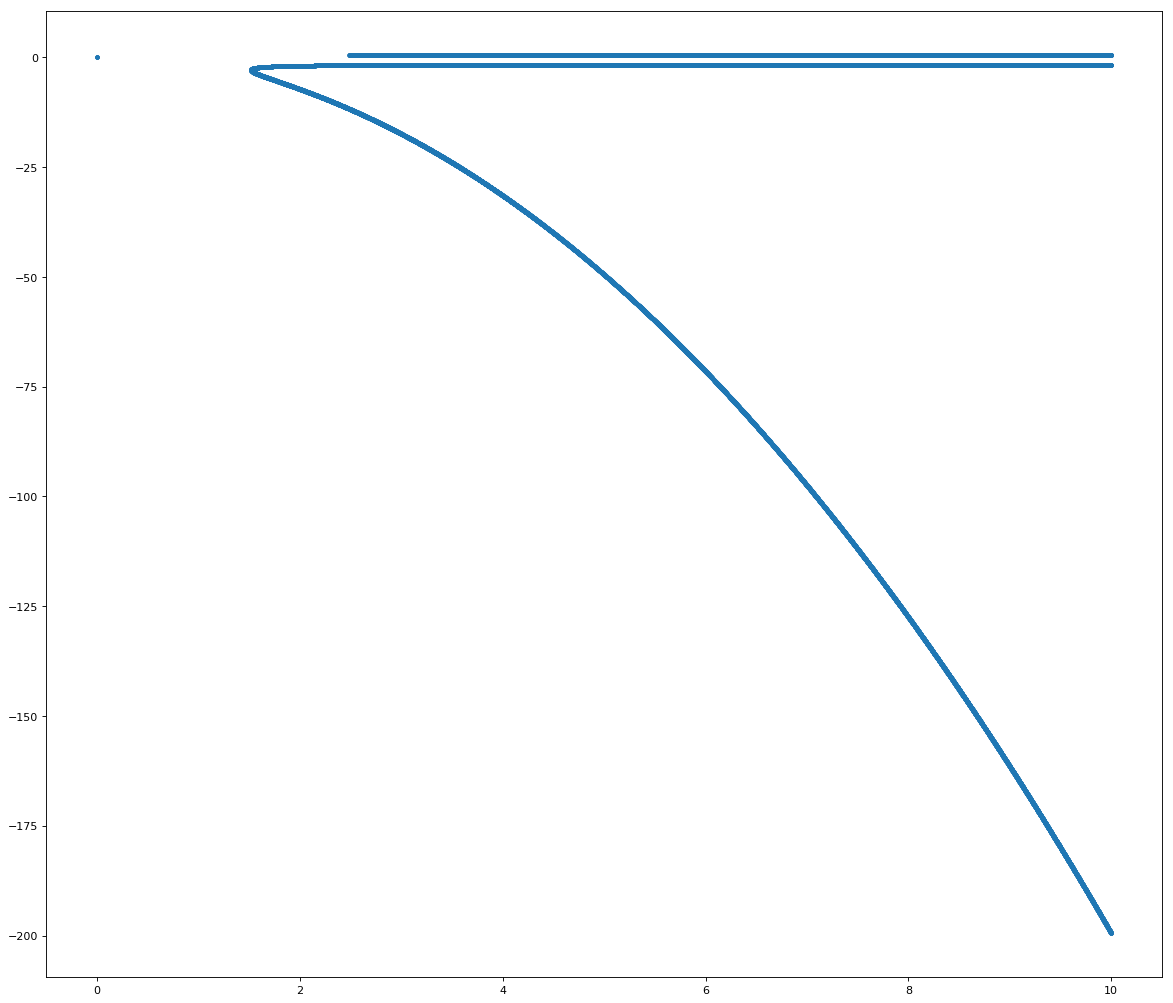

In [3]:
lbda, F0, f0, T = 1,1,1,1
plot_roots()

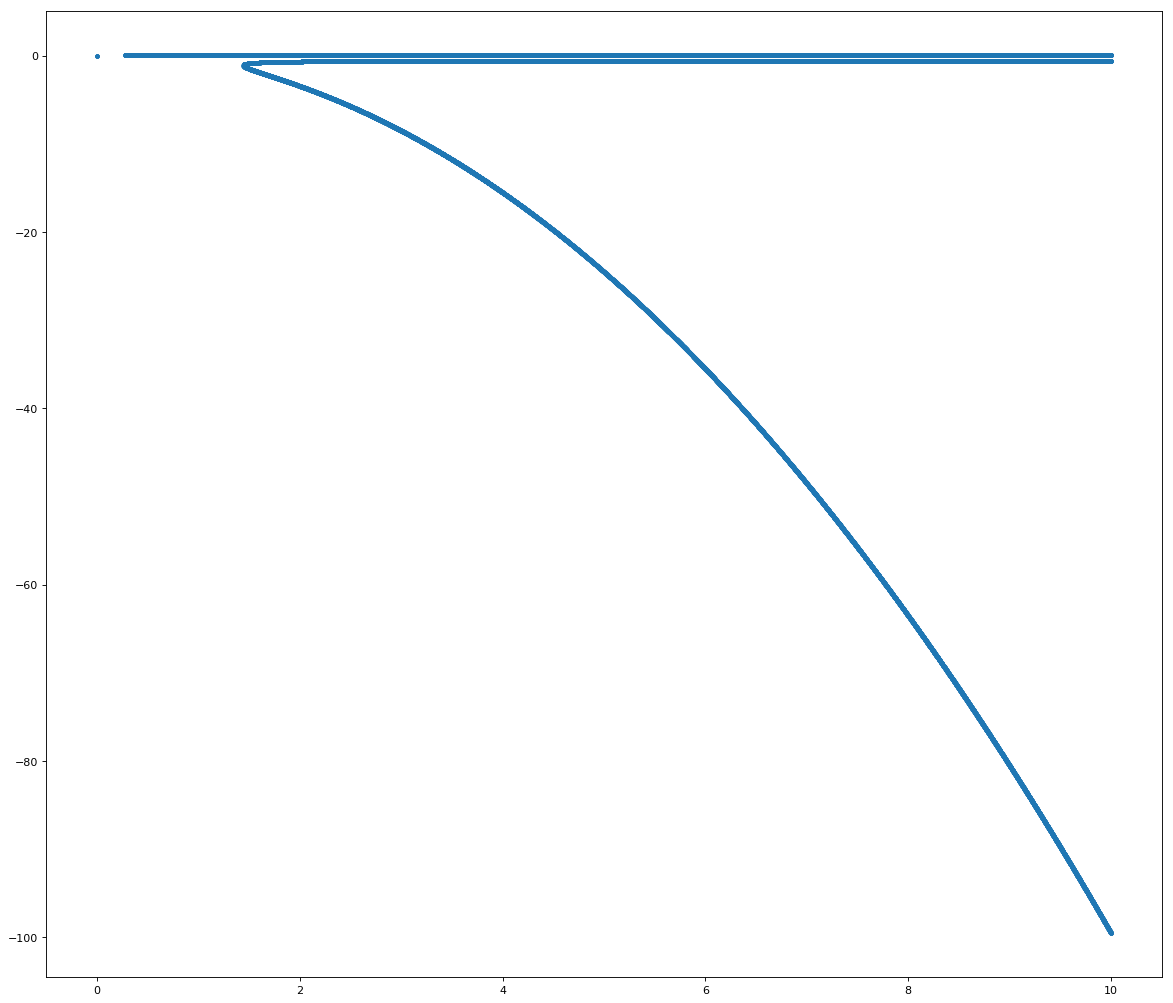

In [4]:
lbda, F0, f0, T = .5,.1,.5,1
plot_roots()
    

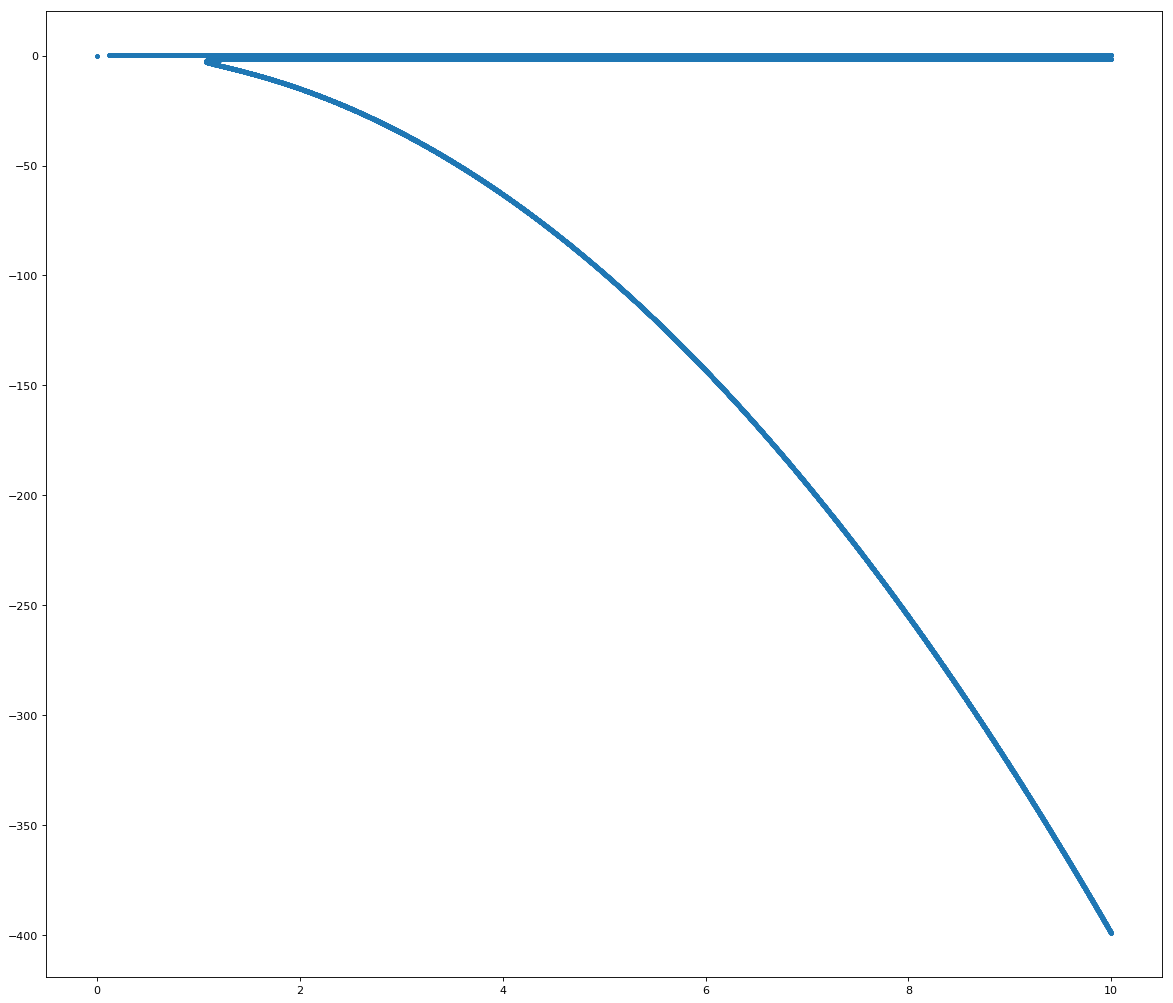

In [5]:
lbda, F0, f0, T = 3,.5,1,1
plot_roots()
    